

```
Generate Fake Transaction Data
```



In [1]:
import pandas as pd
import random
from datetime import datetime, timedelta

# Categories and sample merchants
categories = {
    "Food": ["Zomato", "Swiggy", "Dominos", "KFC"],
    "Travel": ["Uber", "Ola", "IRCTC", "IndiGo"],
    "Shopping": ["Amazon", "Flipkart", "Myntra", "Nykaa"],
    "Subscriptions": ["Netflix", "Spotify", "Hotstar", "YouTube Premium"],
    "Utilities": ["Electricity Bill", "Water Bill", "Gas Bill", "Phone Recharge"],
    "EMI": ["HDFC EMI", "Bajaj EMI", "Home Loan", "Car Loan"],
    "Salary": ["Monthly Salary"],
    "Rent": ["Flat Rent", "House Rent"],
    "Other": ["Misc Payment", "Cash Withdrawal"]
}

# Generate random transactions
def generate_fake_data(n=200):
    data = []
    start_date = datetime(2023, 1, 1)
    for _ in range(n):
        days = random.randint(0, 540)  # Up to 18 months
        date = start_date + timedelta(days=days)
        category = random.choice(list(categories.keys()))
        merchant = random.choice(categories[category])
        amount = random.randint(100, 10000)
        if category == "Salary":
            amount = random.randint(20000, 80000)
        if category in ["Salary"]:
            txn_type = "Credit"
        else:
            txn_type = "Debit"
        data.append([date.strftime("%Y-%m-%d"), merchant, amount, txn_type, ""])
    return pd.DataFrame(data, columns=["Date", "Description", "Amount", "Transaction Type", "Category"])

# Create and display
df = generate_fake_data()
df.to_csv("fake_transactions.csv", index=False)
df.head()


,Date,Description,Amount,Transaction Type,Category
0,2023-11-10,Cash Withdrawal,8703,Debit,
1,2024-04-24,Ola,628,Debit,
2,2024-03-16,Monthly Salary,21308,Credit,
3,2023-06-07,House Rent,8448,Debit,
4,2023-07-28,Flipkart,3885,Debit,


Load and Explore the Data
python
Copy
Edit


In [2]:
# Load data
df = pd.read_csv("fake_transactions.csv")
df["Date"] = pd.to_datetime(df["Date"])

# Explore
print(df.info())
df.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              200 non-null    datetime64[ns]
 1   Description       200 non-null    object        
 2   Amount            200 non-null    int64         
 3   Transaction Type  200 non-null    object        
 4   Category          0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 7.9+ KB
None


,Date,Description,Amount,Transaction Type,Category
0,2023-11-10,Cash Withdrawal,8703,Debit,NaN
1,2024-04-24,Ola,628,Debit,NaN
2,2024-03-16,Monthly Salary,21308,Credit,NaN
3,2023-06-07,House Rent,8448,Debit,NaN
4,2023-07-28,Flipkart,3885,Debit,NaN
5,2023-12-24,YouTube Premium,3051,Debit,NaN
6,2024-01-12,Hotstar,7256,Debit,NaN
7,2023-02-23,Amazon,1891,Debit,NaN
8,2023-09-16,Monthly Salary,29004,Credit,NaN
9,2023-06-27,Electricity Bill,3475,Debit,NaN


 Categorization

In [3]:
def categorize(description):
    description = description.lower()
    if any(word in description for word in ["zomato", "swiggy", "dominos", "kfc"]):
        return "Food"
    elif any(word in description for word in ["uber", "ola", "irctc", "indigo"]):
        return "Travel"
    elif any(word in description for word in ["amazon", "flipkart", "myntra", "nykaa"]):
        return "Shopping"
    elif any(word in description for word in ["netflix", "spotify", "hotstar", "youtube"]):
        return "Subscriptions"
    elif any(word in description for word in ["bill", "recharge"]):
        return "Utilities"
    elif any(word in description for word in ["emi", "loan"]):
        return "EMI"
    elif "salary" in description:
        return "Salary"
    elif "rent" in description:
        return "Rent"
    else:
        return "Other"

df["Category"] = df["Description"].apply(categorize)
df.head(10)


,Date,Description,Amount,Transaction Type,Category
0,2023-11-10,Cash Withdrawal,8703,Debit,Other
1,2024-04-24,Ola,628,Debit,Travel
2,2024-03-16,Monthly Salary,21308,Credit,Salary
3,2023-06-07,House Rent,8448,Debit,Rent
4,2023-07-28,Flipkart,3885,Debit,Shopping
5,2023-12-24,YouTube Premium,3051,Debit,Subscriptions
6,2024-01-12,Hotstar,7256,Debit,Subscriptions
7,2023-02-23,Amazon,1891,Debit,Shopping
8,2023-09-16,Monthly Salary,29004,Credit,Salary
9,2023-06-27,Electricity Bill,3475,Debit,Utilities


Monthly Summary & Visualizations

Adding Month And Year Column

In [4]:
df["YearMonth"] = df["Date"].dt.to_period("M")
df.head()


,Date,Description,Amount,Transaction Type,Category,YearMonth
0,2023-11-10,Cash Withdrawal,8703,Debit,Other,2023-11
1,2024-04-24,Ola,628,Debit,Travel,2024-04
2,2024-03-16,Monthly Salary,21308,Credit,Salary,2024-03
3,2023-06-07,House Rent,8448,Debit,Rent,2023-06
4,2023-07-28,Flipkart,3885,Debit,Shopping,2023-07


Monthly Expense Trend (Line Plot)

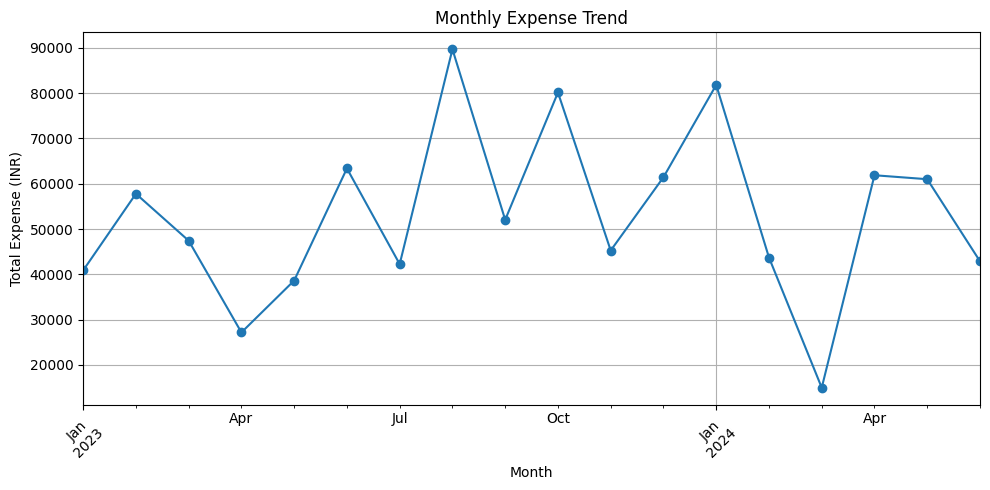

In [5]:
import matplotlib.pyplot as plt

monthly_expense = df[df["Transaction Type"] == "Debit"].groupby("YearMonth")["Amount"].sum()

plt.figure(figsize=(10,5))
monthly_expense.plot(marker='o')
plt.title("Monthly Expense Trend")
plt.xlabel("Month")
plt.ylabel("Total Expense (INR)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Expense Breakdown by Category (Pie Chart)

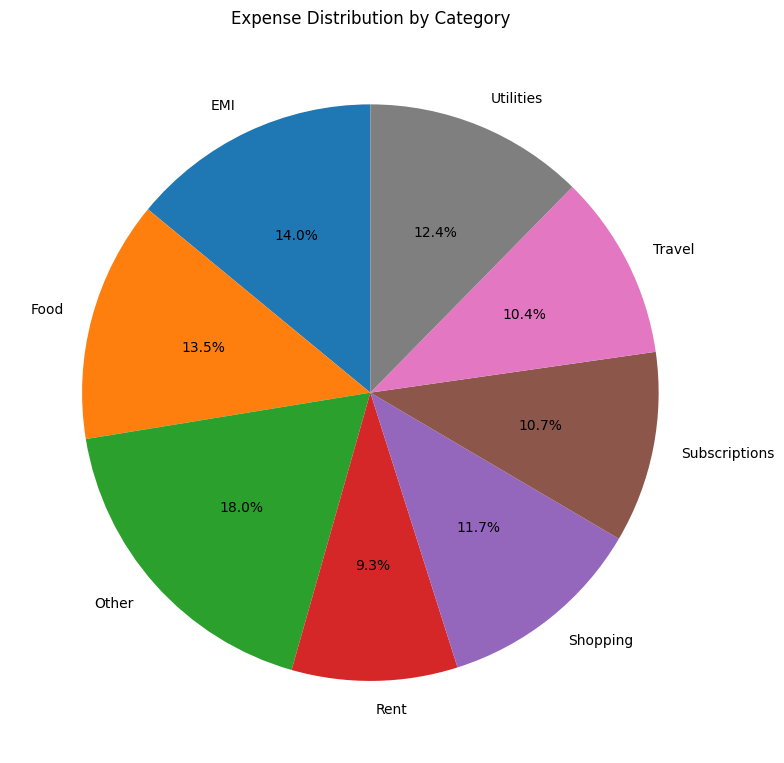

In [6]:
category_expense = df[df["Transaction Type"] == "Debit"].groupby("Category")["Amount"].sum()

plt.figure(figsize=(8,8))
category_expense.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Expense Distribution by Category")
plt.ylabel("")
plt.tight_layout()
plt.show()


Monthly Income vs Expense Summary

In [7]:
summary = df.groupby(["YearMonth", "Transaction Type"])["Amount"].sum().unstack().fillna(0)
summary["Net Savings"] = summary.get("Credit", 0) - summary.get("Debit", 0)

summary = summary.astype(int)
summary


Transaction Type,Credit,Debit,Net Savings
YearMonth,,,
2023-01,50766,40869,9897
2023-02,45311,57790,-12479
2023-03,111563,47432,64131
2023-04,60119,27176,32943
2023-05,75183,38633,36550
2023-06,76792,63387,13405
2023-07,29364,42254,-12890
2023-08,86106,89690,-3584
2023-09,29004,52039,-23035


Insight Generator (NLP-style Tips & Alerts)

Current Month Summary + Alerts

In [8]:
import numpy as np

# Get latest month
latest_month = df["YearMonth"].max()

# Filter data
df_latest = df[df["YearMonth"] == latest_month]
income = df_latest[df_latest["Transaction Type"] == "Credit"]["Amount"].sum()
expenses = df_latest[df_latest["Transaction Type"] == "Debit"]
total_expense = expenses["Amount"].sum()

# Category-wise expense
cat_breakdown = expenses.groupby("Category")["Amount"].sum().to_dict()

# Generate insights
insights = []
insights.append(f"🧾 In {latest_month}, you earned ₹{income:.0f} and spent ₹{total_expense:.0f}.")

if income > 0:
    savings = income - total_expense
    insights.append(f"💰 Net savings: ₹{savings:.0f} ({(savings/income)*100:.1f}% of income)")

# Category alerts
for cat, amt in cat_breakdown.items():
    if amt > 0.2 * income:
        insights.append(f"⚠️ High spending alert: '{cat}' is ₹{amt:.0f}, which is over 20% of income.")
    else:
        insights.append(f"✅ '{cat}' spending is ₹{amt:.0f}.")

# Show insights
for tip in insights:
    print(tip)


🧾 In 2024-06, you earned ₹50441 and spent ₹42888.
💰 Net savings: ₹7553 (15.0% of income)
⚠️ High spending alert: 'EMI' is ₹13363, which is over 20% of income.
⚠️ High spending alert: 'Food' is ₹15277, which is over 20% of income.
✅ 'Other' spending is ₹6281.
✅ 'Travel' spending is ₹7967.


Compare Categories with Last Month

In [9]:
# Get previous month
prev_month = latest_month - 1

df_prev = df[df["YearMonth"] == prev_month]
cat_latest = df_latest[df_latest["Transaction Type"] == "Debit"].groupby("Category")["Amount"].sum()
cat_prev = df_prev[df_prev["Transaction Type"] == "Debit"].groupby("Category")["Amount"].sum()

compare = pd.DataFrame({"Last Month": cat_prev, "This Month": cat_latest}).fillna(0)
compare["Change (%)"] = ((compare["This Month"] - compare["Last Month"]) / compare["Last Month"].replace(0, np.nan)) * 100

# Display top changes
compare = compare.sort_values("Change (%)", ascending=False).round(1)
compare


,Last Month,This Month,Change (%)
Category,,,
Travel,1468,7967.0,442.7
Food,3764,15277.0,305.9
EMI,13956,13363.0,-4.2
Other,19702,6281.0,-68.1
Shopping,12239,0.0,-100.0
Subscriptions,9875,0.0,-100.0


In [10]:
import re

def chat_bot():
    print("💬 Welcome to your Expense Assistant!")
    print("Ask questions like:")
    print(" - What did I spend on Swiggy?")
    print(" - How much did I spend on food last month?")
    print(" - Show my expenses in May 2024")
    print("Type 'exit' to quit.")

    while True:
        query = input("\n🧑 You: ").lower()
        if query in ['exit', 'quit']:
            print("👋 Bye! Stay financially smart.")
            break

        # Handle Swiggy/merchant queries
        merchant_match = re.findall(r"spend on (\w+)", query)
        if merchant_match:
            merchant = merchant_match[0]
            mask = df["Description"].str.lower().str.contains(merchant)
            total = df[mask & (df["Transaction Type"] == "Debit")]["Amount"].sum()
            print(f"🤖 You spent ₹{total:.0f} on {merchant.capitalize()}.")
            continue

        # Handle category + last month
        if "food" in query or "shopping" in query or "travel" in query or "subscriptions" in query:
            cat = None
            for c in ["food", "shopping", "travel", "subscriptions"]:
                if c in query:
                    cat = c.capitalize()
                    break
            if "last month" in query:
                last_month = df["YearMonth"].max() - 1
                total = df[(df["YearMonth"] == last_month) &
                           (df["Category"] == cat) &
                           (df["Transaction Type"] == "Debit")]["Amount"].sum()
                print(f"🤖 You spent ₹{total:.0f} on {cat} in {last_month}.")
                continue

        # Handle specific month/year questions
        month_match = re.search(r"(january|february|march|april|may|june|july|august|september|october|november|december)\s*(\d{4})", query)
        if month_match:
            month_str = month_match.group(1).capitalize()
            year = int(month_match.group(2))
            month_num = {
                'January': 1, 'February': 2, 'March': 3, 'April': 4,
                'May': 5, 'June': 6, 'July': 7, 'August': 8,
                'September': 9, 'October': 10, 'November': 11, 'December': 12
            }[month_str]
            period = pd.Period(f"{year}-{month_num:02}")
            total = df[(df["YearMonth"] == period) & (df["Transaction Type"] == "Debit")]["Amount"].sum()
            print(f"🤖 You spent ₹{total:.0f} in {month_str} {year}.")
            continue

        # Default fallback
        print("🤖 Sorry, I didn’t understand that. Try asking about spending on a merchant, category, or month.")


In [11]:
chat_bot()


💬 Welcome to your Expense Assistant!
Ask questions like:
 - What did I spend on Swiggy?
 - How much did I spend on food last month?
 - Show my expenses in May 2024
Type 'exit' to quit.

🧑 You: Show my expenses in May 2024
🤖 You spent ₹61004 in May 2024.

🧑 You: Show my expenses in Feb 2023
🤖 Sorry, I didn’t understand that. Try asking about spending on a merchant, category, or month.

🧑 You: Show my expenses in February 2023
🤖 You spent ₹57790 in February 2023.

🧑 You:  How much did I spend on food in February 2023
🤖 You spent ₹0 on Food.

🧑 You: exit
👋 Bye! Stay financially smart.
